# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')



In [4]:
# Write your code here to read the data

#I'm using local execution so I don't need to load the drive
original_data = pd.read_csv('foodhub_order.csv')
data = original_data.copy()

In [5]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
data.shape

(1898, 9)

#### Observations:

Using the method shape, we can have an understindig about the dimentions of the dataset, we can clear see that the dataseet has

1898 lines and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We note that we have several columns that are **int**
* order_id --> Numerical but represents one order
* customer_id --> Numerical but represents one user
* food_preparation_time
* delivery_time

We have one Column that is a **float**
* cost_of_the_order

We have 4 columns of type **object**, that in this case are **Strings**
* restaurant_name
* cuisine_type
* day_of_the_week
* rating --> String but could be converted to a int, if we disconsider the "Not Given" values

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
We can see that there is no data missing on this dataset. but the ratings data has a "Not Given" value that could be treated as a missing value, but we will not treat it in this case for now, not until we have a better understanding of the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

To understand the time it takes to prepare the food, we need to consider the **food_preparation_time** column. We can note that the **minimum time** is 20, and the **maximum** is 35, that means menals take between 20 to 35 minutes to be preared. With an **average time** of 27 minutes.

For the average we can consider the mean that is 27.73 or the median that is 27.00, they are close togehter, but i've chosen the median as the better representation of the set.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
data.groupby('rating').size()

rating
3            188
4            386
5            588
Not given    736
dtype: int64

#### Observations:

As we can observe we have **736 orders that are not rated**.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Observations for cost_of_the_order  are:
Max: 35.41
Min: 4.47
Mean: 16.498851422550054
Median: 14.14
Mode: 0    12.18
Name: cost_of_the_order, dtype: float64
Standard Deviation: 7.483812110049554


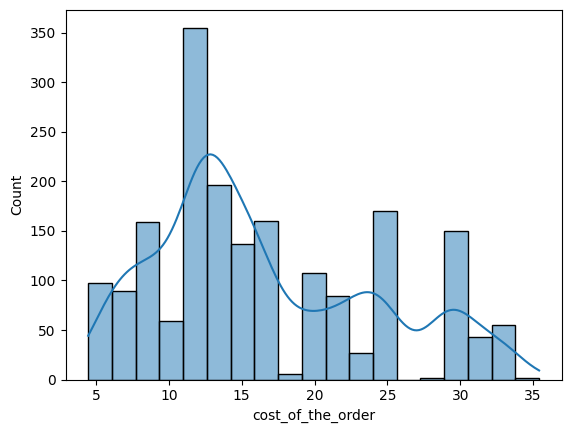

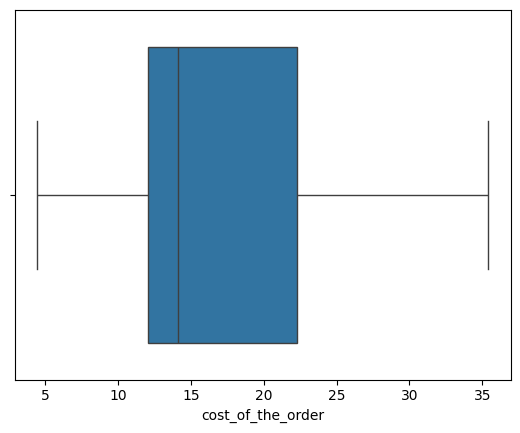

Observations for food_preparation_time  are:
Max: 35
Min: 20
Mean: 27.371970495258168
Median: 27.0
Mode: 0    21
Name: food_preparation_time, dtype: int64
Standard Deviation: 4.632480775928871


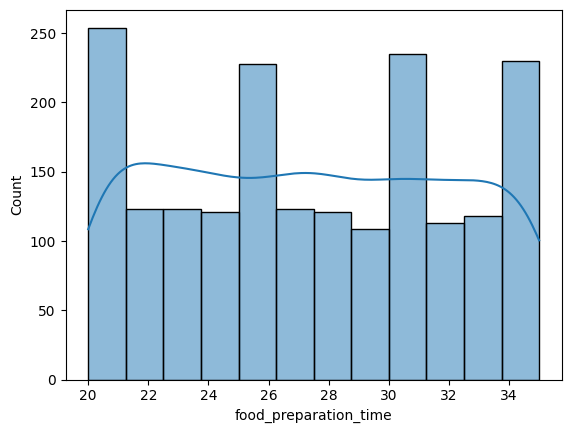

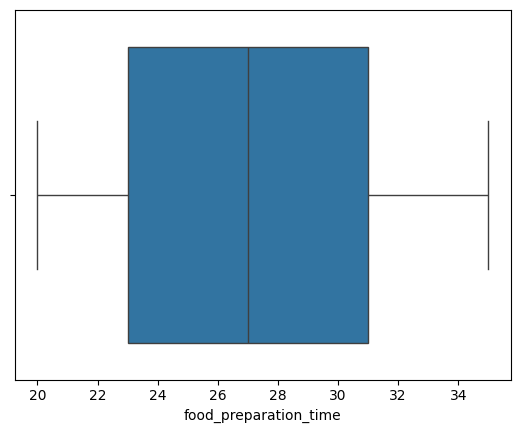

Observations for delivery_time  are:
Max: 33
Min: 15
Mean: 24.161749209694417
Median: 25.0
Mode: 0    24
Name: delivery_time, dtype: int64
Standard Deviation: 4.972636933991107


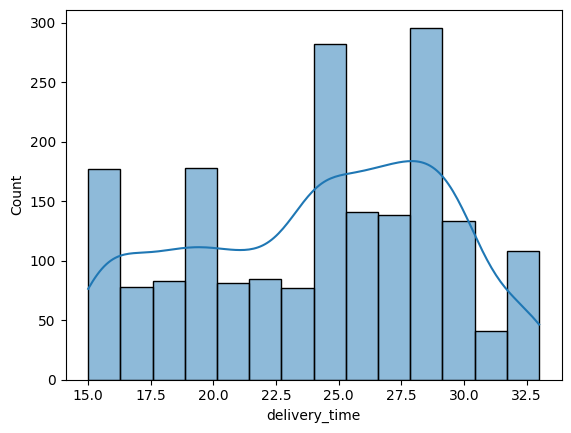

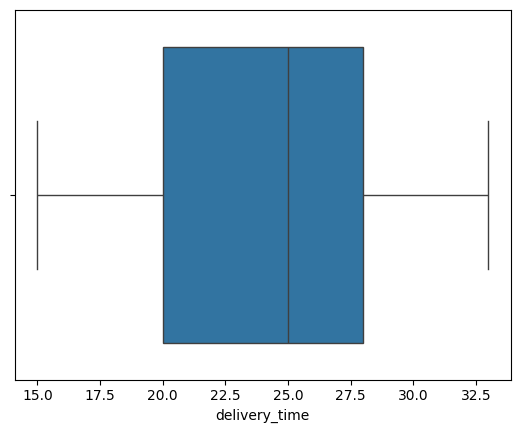

Observations for customer_id  are:
Max: 405334
Min: 1311
Mean: 171168.478398314
Median: 128600.0
Mode: 0    52832
Name: customer_id, dtype: int64
Standard Deviation: 113698.13974303962


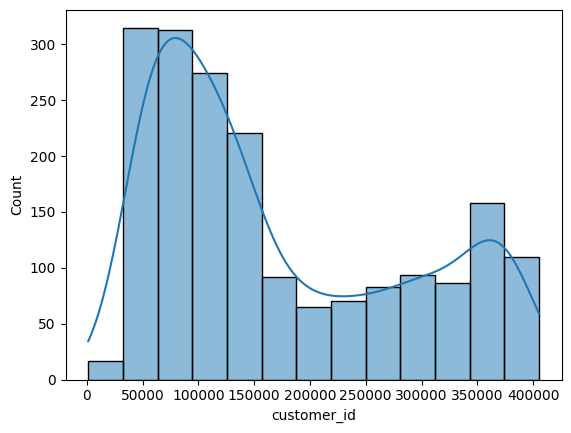

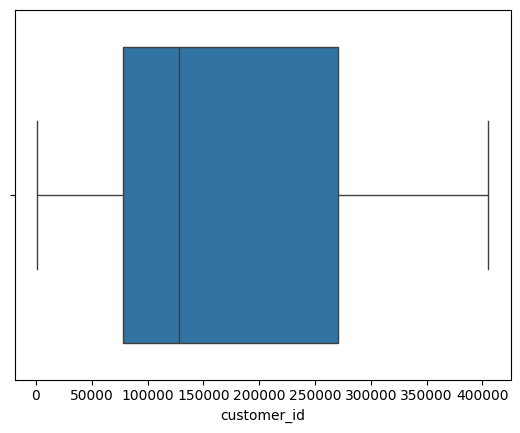

In [11]:
# Write the code here

#create a method to describe the dimensions
def describeDimension(data, dimension):
    print(f"Observations for {dimension}  are:")
    #write the max, min, mean, median, mode, standard deviation
    print(f"Max: {data[dimension].max()}")
    print(f"Min: {data[dimension].min()}")
    print(f"Mean: {data[dimension].mean()}")
    print(f"Median: {data[dimension].median()}")
    print(f"Mode: {data[dimension].mode()}")
    print(f"Standard Deviation: {data[dimension].std()}")
    sns.histplot(data=data,x=dimension, kde=True)
    plt.show()
    sns.boxplot(data=data,x=dimension)
    plt.show()

#list of dimensions we want to analyse
dimensions = ['cost_of_the_order','food_preparation_time','delivery_time','customer_id']

#loop through the dimensions and describe them
for dimension in dimensions:
    describeDimension(data, dimension)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [12]:
# Write the code here
data.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
For us to answert that question we have to group by restaurant names, and sum up the number of orders in descending order, we can see that the top 5 restaurants are:
* **Shake Shack** that has 219 orders
* **The Meatball Shop** that has 132 orders
* **Blue Ribbon Sushi** that has 119 orders
* **Blue Ribbon Fried Chicken** that has 96 orders
* **Parm** that has 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [13]:
# Write the code here
wekend_data = data[(data['day_of_the_week']=='Weekend')]
wekend_data.groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(5)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: order_id, dtype: int64

#### Observations:

Looking at the data the following seems to be the top 5 cuisines on weekends:
* **American** with 415 orders
* **Japanese** with 335 orders
* **Italian** with 207 orders
* **Chinese** with 163 orders
* **Mexican** with 53 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [14]:
# Write the code here
tota_orders = data.order_id.count()
orders_greater_than_20 = data[data['cost_of_the_order']>20].order_id.count()
orders_greater_equal_than_20 = data[data['cost_of_the_order']>=20].order_id.count()

print(f"Total Orders: {tota_orders}")
print(f"Orders greater than 20: {orders_greater_than_20}")
print(f"Orders greater or equal than 20: {orders_greater_equal_than_20}")
print(f"Percentage of orders greater than 20: {orders_greater_than_20/tota_orders*100}")
print(f"Percentage of orders greater or equal than 20: {orders_greater_equal_than_20/tota_orders*100}")

Total Orders: 1898
Orders greater than 20: 555
Orders greater or equal than 20: 555
Percentage of orders greater than 20: 29.24130663856691
Percentage of orders greater or equal than 20: 29.24130663856691


#### Observations:

As we can see the number of orders that cost more than 20 dollars is 555, and the total number of orders is 1898, so the **percentage of orders that cost more than 20 dollars is 29.24%**.

PS: Since "cost more than 20 dolars" is not clear, i've considered both scenarios including and excluding the orders that cost 20 dolars exactly, but in this case there is no scenario of the order costing exactly 20 dolars. so the numbers are the same.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [15]:
# Write the code here

mean_delivery_time = data.delivery_time.mean()

print(f"Mean delivery time: {mean_delivery_time}")

Mean delivery time: 24.161749209694417


#### Observations:

The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [16]:
# Write the code here
data.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:

Considering the top 3 most frequent customers we have the following IDs and number of orders:
* **52832** with 13 orders
* **47440** with 10 orders
* **83287** with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


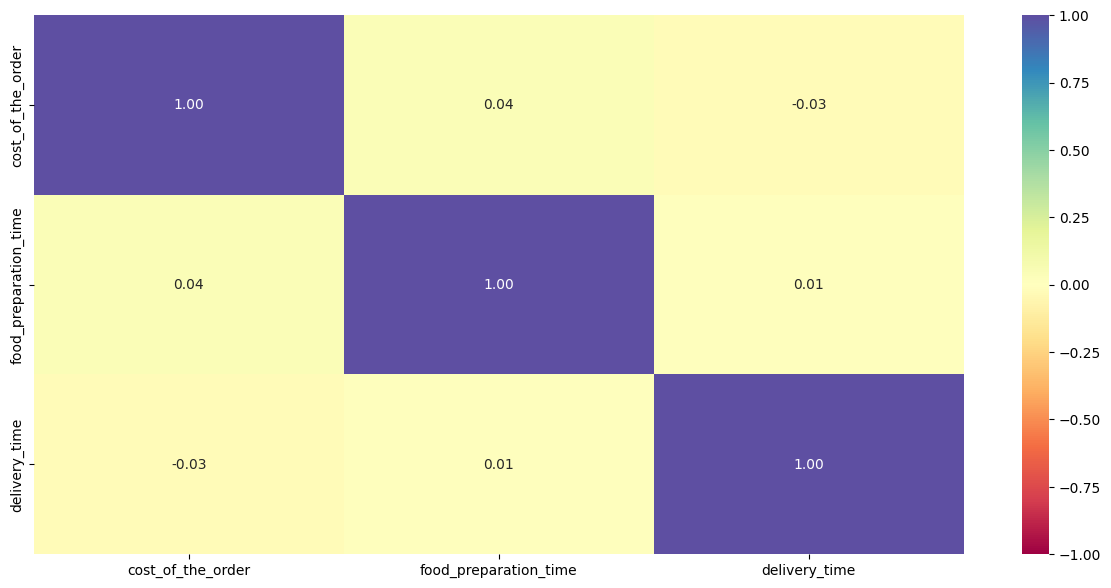

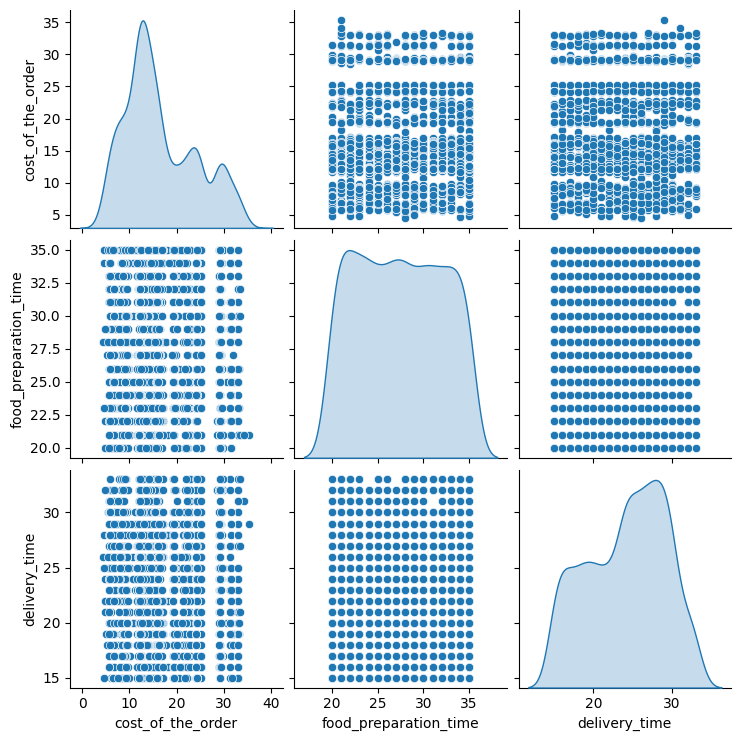

In [17]:
# Write the code here

# first lets check the correlation between the numerical variables, using a heatmap
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = data[num_var].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#now lets check for visual correlation between the numerical variables
sns.pairplot(data=data[num_var], diag_kind="kde")
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [18]:
# Write the code here
promotional_offer = pd.DataFrame()
average_restaurant_rating = pd.DataFrame()

#first lets check the count for restaurants that have more than 50 ratings (that are not "Not given")
restaurant_ratings_series = data[data['rating'] != 'Not given'].groupby('restaurant_name')['rating'].count().sort_values(ascending=False)
promotional_offer['restaurant_name'] = restaurant_ratings_series[restaurant_ratings_series > 50].index
promotional_offer['rating_count'] = restaurant_ratings_series[restaurant_ratings_series > 50].values


#now lets check the average rating for restaurants, for this analysis we will only consider the ratings that are not "Not given"
restaurant_ratings_series = data[data['rating'] != 'Not given']['rating'].astype(int).groupby(data['restaurant_name']).mean().sort_values(ascending=False)

average_restaurant_rating['restaurant_name'] = restaurant_ratings_series.index
average_restaurant_rating['average_rating'] = restaurant_ratings_series.values

#now lets merge the two dataframes
promotional_offer = pd.merge(promotional_offer, average_restaurant_rating, on='restaurant_name')

promotional_offer.head(5)

,restaurant_name,rating_count,average_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:

There are 4 restaurants that fulfill the criteria to get the promotional offer:
* **Shake Shack** with 133 orders and an average rating of 4.3
* **The Meatball Shop** with 84 orders and an average rating of 4.5
* **Blue Ribbon Sushi** with 73 orders and an average rating of 4.2
* **Blue Ribbon Fried Chicken** with 64 orders and an average rating of 4.3

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [19]:
# Write the code here

#define the function to calculate the net profit
def net_profit(cost):
    if cost > 20:
        return .25*cost
    elif cost > 5:
        return .15*cost
    else:
        return 0


#apply the function to create the net revenue column
data['net_revenue'] = data['cost_of_the_order'].apply(net_profit)

print(f"Total Net Revenue: {data['net_revenue'].sum()}")

Total Net Revenue: 6166.303


#### Observations:

Tje net revenue generated by the company across all orders is  6166.30 dolars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [20]:
# Write the code here
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()

number_of_orders = data.order_id.count()
number_of_orders_late = data[data['total_time']>60].order_id.count()

print(f"Number of orders: {number_of_orders}")
print(f"Number of orders late: {number_of_orders_late}")
print(f"Percentage of orders late: {number_of_orders_late/number_of_orders*100}")

Number of orders: 1898
Number of orders late: 200
Percentage of orders late: 10.537407797681771


#### Observations:

The number of orders that take more than 60 minutes to get delivered is 200, so the percentage of orders that take more than 60 minutes to get delivered is 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [21]:
# Write the code here
data.groupby('day_of_the_week')['delivery_time'].mean().sort_values(ascending=False)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

The mean delivery time on weekdays is 28.34 minutes and on weekends is 22.47 minutes, so the mean delivery time is lower on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---